In [1]:
import sys
sys.path.insert(0, '/workspaces/Hackathon-America')

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from src.models.team_profiler_PCA import AmericaProfiler
from src.models.team_fit_analyzer import TeamFitAnalyzer
from src.utils.data_loader import DataLoader

In [2]:
profiler = AmericaProfiler()

# 4 temporadas de Liga MX
seasons = [
    (73, 317),  # 2024/2025
    (73, 281),  # 2023/2024
    (73, 235),  # 2022/2023
    (73, 108),  # 2021/2022
]

america_profile = profiler.build_profile(seasons=seasons)

Usuario configurado: itam_hackathon@hudl.com
Construyendo perfil del América...
Analizando 4 temporadas

Temporada 317...
Obteniendo estadísticas de equipos (Comp: 73, Temp: 317)...
Estadísticas de 18 equipos obtenidas
Stats obtenidas
Obteniendo partidos (Comp: 73, Temp: 317)...
340 partidos obtenidos
47 partidos
Temporada 281...
Obteniendo estadísticas de equipos (Comp: 73, Temp: 281)...
Estadísticas de 18 equipos obtenidas
Stats obtenidas
Obteniendo partidos (Comp: 73, Temp: 281)...
340 partidos obtenidos
46 partidos
Temporada 235...
Obteniendo estadísticas de equipos (Comp: 73, Temp: 235)...
Estadísticas de 18 equipos obtenidas
Stats obtenidas
Obteniendo partidos (Comp: 73, Temp: 235)...
342 partidos obtenidos
42 partidos
Temporada 108...
Obteniendo estadísticas de equipos (Comp: 73, Temp: 108)...
Estadísticas de 18 equipos obtenidas
Stats obtenidas
Obteniendo partidos (Comp: 73, Temp: 108)...
342 partidos obtenidos
40 partidos

Consolidado: 4 temporadas, 175 partidos
Total equipos 

In [3]:
analyzer = TeamFitAnalyzer(america_profile=america_profile)
analyzer.fit(min_minutes=500)

Preparando Team Fit Analyzer...
Cargando datos desde: /workspaces/Hackathon-America/data/processed/all_players_processed.csv
Cargados 1667 registros
Listo para 1611 jugadores



In [4]:
#Vamos a hacer el analisis para un jugador en especifico (que no este en el Club America)

player = "Yeferson Julio Soteldo Martínez"

fit_result = analyzer.calculate_team_fit(player_name=player)

Analizando a Yeferson Julio Soteldo Martínez
   Posición: FWD (Left Wing)
   Equipo: Tigres UANL

ANÁLISIS DE COMPATIBILIDAD - CLUB AMÉRICA

Yeferson Julio Soteldo Martínez
FWD | Tigres UANL

SCORES DE COMPATIBILIDAD:
   Overall Fit:    64.7/100
   Technical Fit:  14.1/100 (35% peso)
   Tactical Fit:   100.0/100 (30% peso)
   Impact Score:   85.1/100 (35% peso)

FORTALEZAS:
   • Alta adaptabilidad táctica
   • Alto impacto proyectado

ÁREAS DE ATENCIÓN:
   • Habilidades técnicas por debajo del estándar
   • Experiencia limitada (637.0 minutos)

MÉTRICAS:
   Minutos: 637.0 | OBV: 0.54
   Goles: 0.14 | Assists: 0.28




In [6]:
#Ejemplo por posicion

print("TOP 3 DELANTEROS:\n")

fw_recs = analyzer.recommend_best_fits(
    position='FWD',
    top_n=3,
    min_overall_fit=60.0
)

display(fw_recs)

TOP 3 DELANTEROS:

Buscando top 3 FWDs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,primary_position,minutes,overall_fit,technical_fit,tactical_fit,impact_score,goals_90,assists_90,obv_90
0,Ernesto Alexis Vega Rojas,Toluca,Left Wing,3490.6829,98.372712,99.021958,95.751007,99.970641,0.412527,0.335178,0.362403
1,César Saúl Huerta Valera,Pumas UNAM,Left Wing,1643.2667,94.874396,97.437856,95.870991,91.456713,0.273845,0.219076,0.290629
2,Florian Thauvin,Tigres UANL,Right Wing,1732.8169,83.365222,60.715188,98.355118,93.166773,0.259693,0.155816,0.292492


In [7]:
print("TOP 3 MEDIOCAMPISTAS:\n")

mf_recs = analyzer.recommend_best_fits(
    position='MED',
    top_n=3,
    min_overall_fit=60.0
)

display(mf_recs)

TOP 3 MEDIOCAMPISTAS:

Buscando top 3 MEDs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,primary_position,minutes,overall_fit,technical_fit,tactical_fit,impact_score,goals_90,assists_90,obv_90
0,Leonardo Cecilio Fernández López,Toluca,Centre Attacking Midfielder,2673.6995,99.991927,99.998752,99.977988,99.997050,0.336612,0.403935,0.366059
1,José Antonio Paradela,Necaxa,Centre Attacking Midfielder,3455.9836,99.931488,99.932416,99.873508,99.980258,0.286460,0.338543,0.283904
2,Agustín Palavecino,Necaxa,Right Defensive Midfielder,3576.7168,99.910953,99.850161,100.000000,99.895419,0.201302,0.150976,0.256531


In [8]:
print("TOP 3 DEFENSAS:\n")

def_recs = analyzer.recommend_best_fits(
    position='DEF',
    top_n=3,
    min_overall_fit=60.0
)

display(def_recs)

TOP 3 DEFENSAS:

Buscando top 3 DEFs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,primary_position,minutes,overall_fit,technical_fit,tactical_fit,impact_score,goals_90,assists_90,obv_90
0,Diego Armando Barbosa Zaragoza,Tijuana,Right Back,2428.7334,98.777263,97.770815,100.000000,98.735651,0.000000,0.074113,0.311750
1,Yairo Yesid Moreno Berrío,Pachuca,Left Back,1629.8834,97.305940,99.879646,99.389058,92.946704,0.165656,0.000000,0.296627
2,Javier Ignacio Aquino Carmona,Tigres UANL,Left Wing Back,3914.0332,93.970725,97.230309,83.395744,99.775412,0.000000,0.091977,0.287669


In [11]:
#Tambien podemos comparar multiples candidatos

candidatos = ["José Antonio Paradela", "Juan Francisco Brunetta", "Yeferson Julio Soteldo Martínez"] 

print("COMPARACIÓN DE CANDIDATOS:\n")

comparison = []
for player in candidatos:
    try:
        result = analyzer.calculate_team_fit(player_name=player)
        comparison.append({
            'Player': result['player_name'],
            'Team': result['current_team'],
            'Overall Fit': result['overall_fit'],
            'Technical': result['technical_fit'],
            'Tactical': result['tactical_fit'],
            'Impact': result['impact_score']
        })
    except Exception as e:
        print(f"{player}: {e}")

if comparison:
    comp_df = pd.DataFrame(comparison)
    display(comp_df.sort_values('Overall Fit', ascending=False))

COMPARACIÓN DE CANDIDATOS:

Analizando a José Antonio Paradela
   Posición: MED (Centre Attacking Midfielder)
   Equipo: Necaxa

ANÁLISIS DE COMPATIBILIDAD - CLUB AMÉRICA

José Antonio Paradela
MED | Necaxa

SCORES DE COMPATIBILIDAD:
   Overall Fit:    99.9/100
   Technical Fit:  99.9/100 (35% peso)
   Tactical Fit:   99.9/100 (30% peso)
   Impact Score:   100.0/100 (35% peso)

FORTALEZAS:
   • Excelentes habilidades técnicas
   • Alta adaptabilidad táctica
   • Alto impacto proyectado
   • Experiencia sólida (3455.9836 minutos)

MÉTRICAS:
   Minutos: 3455.9836 | OBV: 0.28
   Goles: 0.29 | Assists: 0.34


Analizando a Juan Francisco Brunetta
   Posición: MED (Centre Attacking Midfielder)
   Equipo: Tigres UANL

ANÁLISIS DE COMPATIBILIDAD - CLUB AMÉRICA

Juan Francisco Brunetta
MED | Tigres UANL

SCORES DE COMPATIBILIDAD:
   Overall Fit:    94.8/100
   Technical Fit:  90.5/100 (35% peso)
   Tactical Fit:   98.9/100 (30% peso)
   Impact Score:   95.6/100 (35% peso)

FORTALEZAS:
   • Exce

,Player,Team,Overall Fit,Technical,Tactical,Impact
0,José Antonio Paradela,Necaxa,99.931488,99.932416,99.873508,99.980258
1,Juan Francisco Brunetta,Tigres UANL,94.789817,90.509771,98.879800,95.564164
2,Yeferson Julio Soteldo Martínez,Tigres UANL,64.702485,14.091550,99.956142,85.095998


In [16]:
print("RESUMEN DE RECOMENDACIONES POR POSICIÓN\n")

positions = ['FWD', 'MED', 'DEF', 'GK']
all_recommendations = {}

for pos in positions:
    print(f"\n{'='*70}")
    print(f"POSICIÓN: {pos}")
    print('='*70)
    
    try:
        recs = analyzer.recommend_best_fits(
            position=pos,
            top_n=3,
            min_overall_fit=60.0
        )
        
        all_recommendations[pos] = recs
        
        # Mostrar solo columnas clave
        display(recs[['player_name', 'team_name', 'overall_fit', 
                      'technical_fit', 'tactical_fit', 'impact_score']])
        
    except Exception as e:
        print(f"Error: {e}")

print("\n" + "="*70)
print("Análisis completo")

RESUMEN DE RECOMENDACIONES POR POSICIÓN


POSICIÓN: FWD
Buscando top 3 FWDs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,overall_fit,technical_fit,tactical_fit,impact_score
0,Ernesto Alexis Vega Rojas,Toluca,98.372712,99.021958,95.751007,99.970641
1,César Saúl Huerta Valera,Pumas UNAM,94.874396,97.437856,95.870991,91.456713
2,Florian Thauvin,Tigres UANL,83.365222,60.715188,98.355118,93.166773



POSICIÓN: MED
Buscando top 3 MEDs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,overall_fit,technical_fit,tactical_fit,impact_score
0,Leonardo Cecilio Fernández López,Toluca,99.991927,99.998752,99.977988,99.997050
1,José Antonio Paradela,Necaxa,99.931488,99.932416,99.873508,99.980258
2,Agustín Palavecino,Necaxa,99.910953,99.850161,100.000000,99.895419



POSICIÓN: DEF
Buscando top 3 DEFs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,overall_fit,technical_fit,tactical_fit,impact_score
0,Diego Armando Barbosa Zaragoza,Tijuana,98.777263,97.770815,100.000000,98.735651
1,Yairo Yesid Moreno Berrío,Pachuca,97.305940,99.879646,99.389058,92.946704
2,Javier Ignacio Aquino Carmona,Tigres UANL,93.970725,97.230309,83.395744,99.775412



POSICIÓN: GK
Buscando top 3 GKs para el América...
   Fit mínimo: 60.0/100

3 recomendaciones encontradas



,player_name,team_name,overall_fit,technical_fit,tactical_fit,impact_score
0,Camilo Andrés Vargas Gil,Atlas,99.274796,97.972543,100.000000,99.955444
1,José Raúl Rangel Aguilar,Guadalajara,98.085615,97.030718,97.155118,99.938079
2,Washington Omar Aguerre Lima,Querétaro,94.439033,88.312545,96.380261,98.901612



Análisis completo


In [17]:
#Podemos exportar los resultados del perfil del America y las recomendaciones
profiler.export_profile(filepath="/workspaces/Hackathon-America/data/results/america_profile.json")

# Exportar recomendaciones a Excel
with pd.ExcelWriter('/workspaces/Hackathon-America/data/results/america_recommendations.xlsx') as writer:
    for pos, recs in all_recommendations.items():
        recs.to_excel(writer, sheet_name=pos, index=False)

print("Listo...")

Perfil exportado: /workspaces/Hackathon-America/data/results/america_profile.json
Listo...


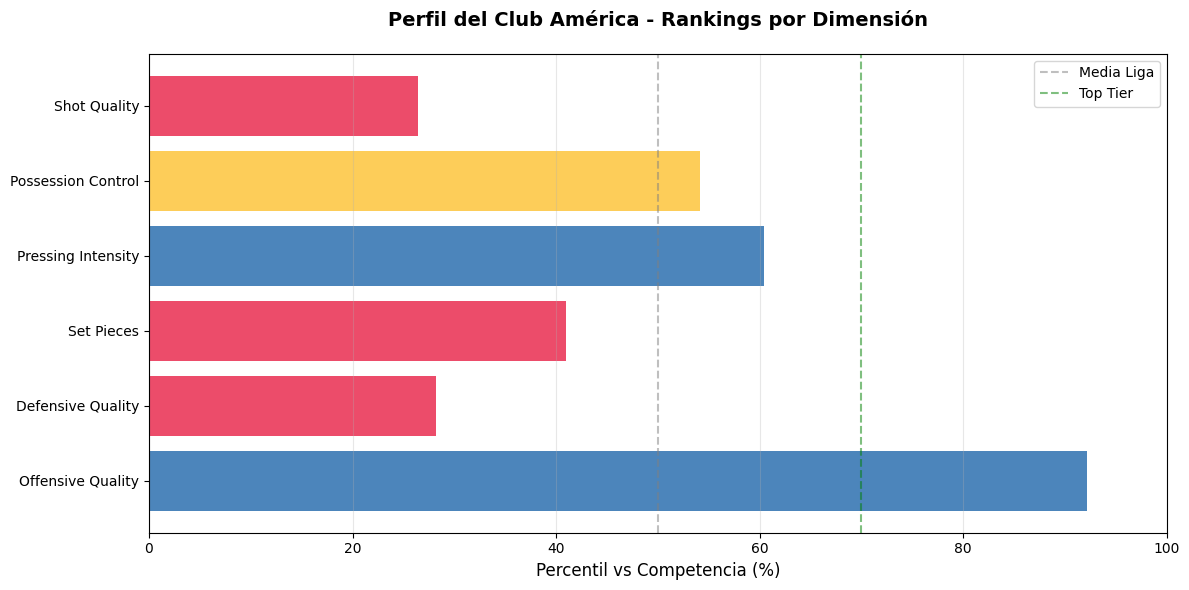

In [18]:
#Para visualizar el perfil del Club America segun sus ramas principales (a criterio propio, pero modificable)

import matplotlib.pyplot as plt
import numpy as np

# Extraer rankings
rankings = america_profile['rankings']

dimensions = list(rankings.keys())
values = list(rankings.values())

# Limpiar nombres
dim_names = [d.replace('_', ' ').title() for d in dimensions]

# Crear gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#00529F' if v >= 60 else '#FDB913' if v >= 50 else '#E4002B' for v in values]
bars = ax.barh(dim_names, values, color=colors, alpha=0.7)

# Líneas de referencia
ax.axvline(x=50, color='gray', linestyle='--', alpha=0.5, label='Media Liga')
ax.axvline(x=70, color='green', linestyle='--', alpha=0.5, label='Top Tier')

ax.set_xlabel('Percentil vs Competencia (%)', fontsize=12)
ax.set_title('Perfil del Club América - Rankings por Dimensión', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 100)
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()